In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Done")

Done


## Importing the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv')
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


## Understanding what are the features of our Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


## Statistical Features of our Dataset

In [4]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


## Checking if there is any Duplicated Value in the Dataset

In [6]:
df.duplicated().sum()

0

## Understanding what are the different kinds of Product Categories, Payment Methods and regions in our Dataset

In [12]:
print("Different kinds of Product Categories = ",df['Product Category'].unique())
print("Different kinds of Payment Methods = ", df['Payment Method'].unique())
print("Different kinds of Regions = ", df['Region'].unique())

Different kinds of Product Categories =  ['Electronics' 'Home Appliances' 'Clothing' 'Books' 'Beauty Products'
 'Sports']
Different kinds of Payment Methods =  ['Credit Card' 'PayPal' 'Debit Card']
Different kinds of Regions =  ['North America' 'Europe' 'Asia']


## Visually Understanding the DataSet and how they are distributed

<Axes: ylabel='count'>

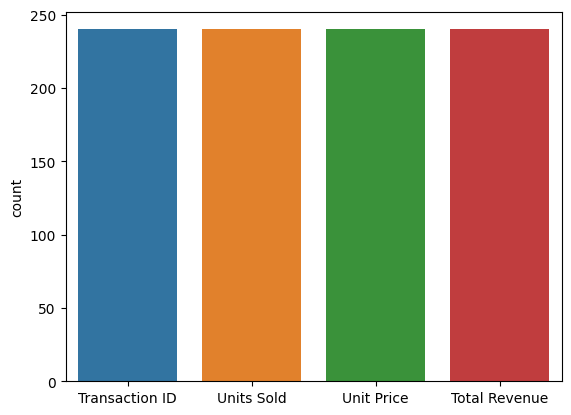

In [52]:
sns.countplot(df)

## Understanding how Unit Price is distributed

(array([116.,  37.,  24.,  14.,   7.,  10.,   8.,   4.,   3.,   2.,   1.,
          2.,   2.,   0.,   0.,   2.,   2.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   6.5   ,   84.3698,  162.2396,  240.1094,  317.9792,  395.849 ,
         473.7188,  551.5886,  629.4584,  707.3282,  785.198 ,  863.0678,
         940.9376, 1018.8074, 1096.6772, 1174.547 , 1252.4168, 1330.2866,
        1408.1564, 1486.0262, 1563.896 , 1641.7658, 1719.6356, 1797.5054,
        1875.3752, 1953.245 , 2031.1148, 2108.9846, 2186.8544, 2264.7242,
        2342.594 , 2420.4638, 2498.3336, 2576.2034, 2654.0732, 2731.943 ,
        2809.8128, 2887.6826, 2965.5524, 3043.4222, 3121.292 , 3199.1618,
        3277.0316, 3354.9014, 3432.7712, 3510.641 , 3588.5108, 3666.3806,
        3744.2504, 3822.1202, 3899.99  ]),
 <BarContainer object o

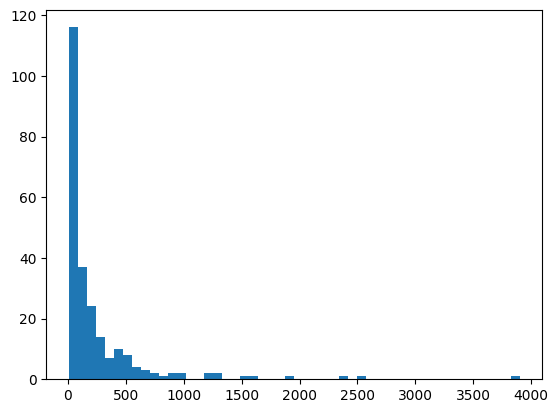

In [8]:
plt.hist(df['Unit Price'], bins = 50)

## What are the different regions and how many people actually belong from them.

(array([80.,  0., 80.,  0., 80.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

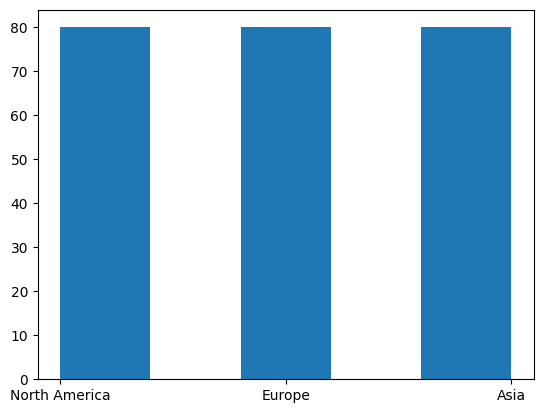

In [9]:
plt.hist(df['Region'], bins = 5)

## Different Kinds of Payment Methods used while Purchasing.
## How are they distributed over the dataset

(array([120.,  80.,  40.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

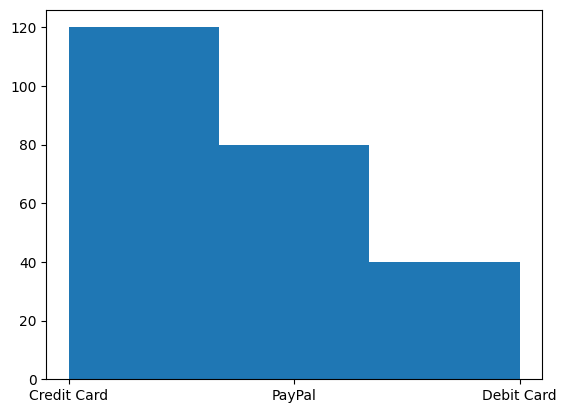

In [10]:
plt.hist(df['Payment Method'], bins = 3)

## Understanding how many Product categories are there and their numbers.

(array([40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 40.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

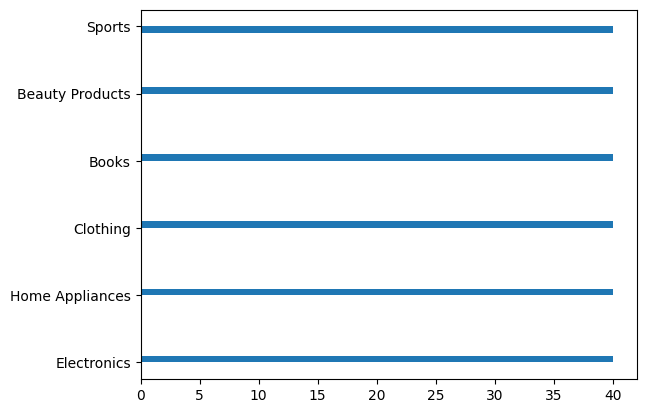

In [11]:
plt.hist(df['Product Category'],bins = 50, orientation = 'horizontal' )

## What category contributed the highest as per the Unit Price?

<Axes: xlabel='Product Category'>

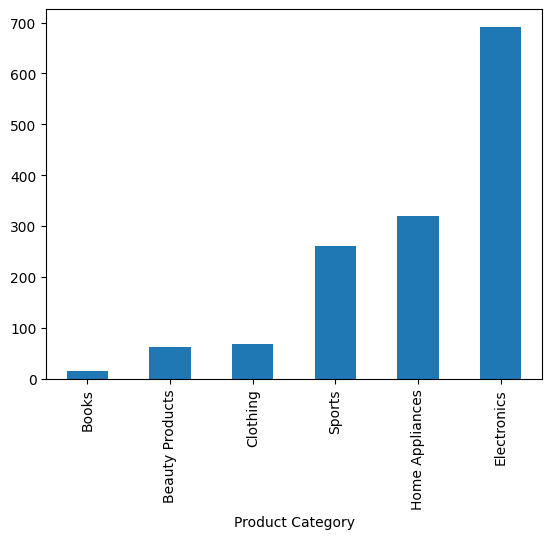

In [26]:
df.groupby("Product Category")['Unit Price'].mean().sort_values().plot(kind = 'bar')


## What category was the highest contributing as per the Total revenue?

<Axes: xlabel='Product Category'>

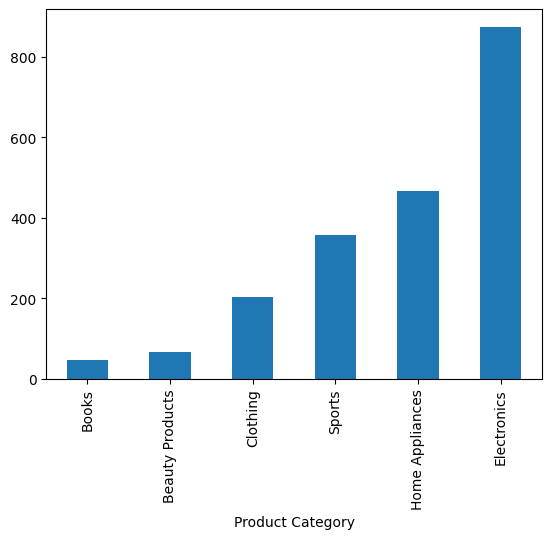

In [27]:
df.groupby("Product Category")['Total Revenue'].mean().sort_values().plot(kind = 'bar')

## What categories sold the highest amount of Units?

<Axes: xlabel='Product Category'>

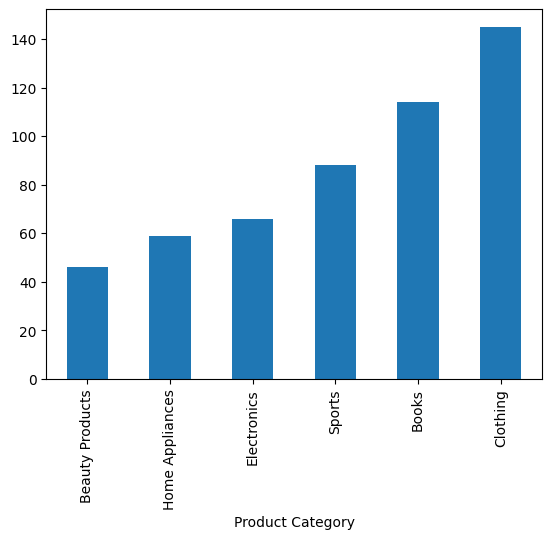

In [29]:
df.groupby("Product Category")['Units Sold'].sum().sort_values().plot(kind ='bar')

## How different regions are responsible for the Total Revenue?

<Axes: ylabel='Total Revenue'>

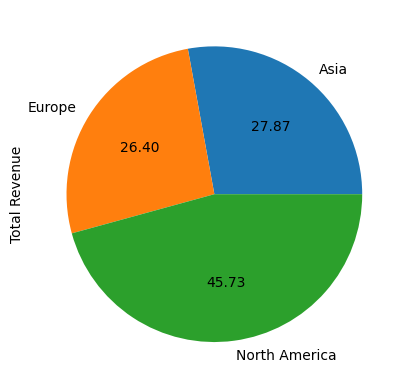

In [35]:
df.groupby('Region')['Total Revenue'].mean().plot(kind = 'pie', autopct = '%.2f')

## How different regions are responsible for the Total units sold?

<Axes: ylabel='Units Sold'>

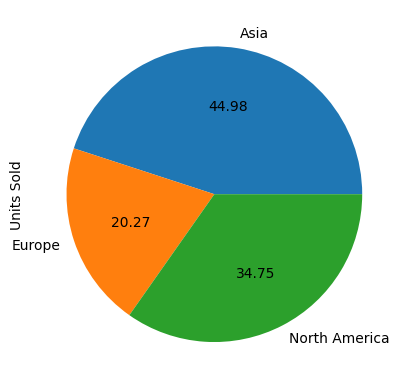

In [38]:
df.groupby('Region')['Units Sold'].sum().plot(kind = 'pie', autopct = '%.2f')

## What are the Payment Methods used for all the units sold?

<Axes: ylabel='Units Sold'>

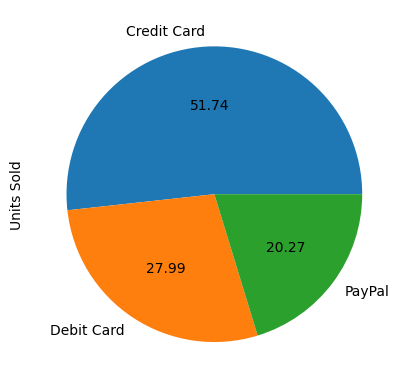

In [54]:
df.groupby('Payment Method')['Units Sold'].sum().plot(kind = 'pie', autopct = '%.2f')

From the analysis above and the dataset provided, we can understand that,

**1. Most preferred Payment Method was Credit card whereas debit Card the least preferred.**

**2. Electronics category had the highest mean Unit Price whereas Books had the least mean Unit Price.**

**3. Electronic category contributed the highest in the Total revenue, wheras Books contributed the least in Total revenue.**

**4. The Highest no. of units sold were in the Clothing category whereas Beauty Products sold the least no. of units.**

**5. North America is the highest contributor for the Total Revenue at 45.73% whereas Europe conributes the least for the Total Revenue at 26.40% .**

**6. Asia orders the most number of items online, contributing almost 44.98% of total units sold whereas Europe contributes the least for Total Number of Items sold at 20.27% .**

**7.As the Total units sold, most preferred Payment Method was Credit Card, contributing almost 51.74% of the payments whereas Paypal was the least preferred method of payment, contributing 20.27% .**